### Karmaşık Ağ Analizi Ödev
1. InputFileNodes dosyasında ID sütunu düğüm isimleri olacak.
2. InputFileEdges dosyasında from ve to sütunları kenarları oluşturacak
3. Tekrar eden kenarlar birleştirilecek
4. Yönsüz Network oluşturulacak ve çizdilecek(network ismi G)
5. Yönlü Network oluşturulacak ve çizdilecek(network ismi G_directed)
6. G network için tüm düğümlerin dereceleri listelenecek
7. G network için ortalama derece hesaplanacak
8. G network için histogram çizdirilecek
9. G network için her düğümün Degree centrality değerleri hesaplanacak
10. G network için her düğümün Closeness centrality değerleri hesaplanacak
11.  G network için her düğümün Betweenness centrality değerleri hesaplanacak
12.  G network için her düğümün Eigenvector centrality değerleri hesaplanacak
13. G network için her düğümün Katz centrality değerleri hesaplanacak
14. G network için her düğümün PageRank centrality değerleri hesaplanacak
15. G network için modularity hesaplanacak
16.  G network için density hesaplanacak
17.  G network için average clustering hesaplanacak
18.  G network için diameter hesaplanacak
19. G network için derece dağılımı hesaplanacak ve çizdirilecek 
20.  Hesaplanan tüm metrikler 
21. G network için  En Kritik 5 'Köprü' Düğümü sıralayınız
22. G network için  En Kritik 5 'Lider ' Düğümü sıralayınız
23. G_directed network için derece dağılımı hesaplanacak ve çizdirilecek
24. G network için en güçlü 3 düğümü bularak ağdan kaldırınız ve oluşan yeni ağı çizdirerek değişimi yorumlayınız.

## 1. Kütüphane Yüklemeleri


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from IPython.display import display


## 2. Veri Yükleme ve Temizleme


In [12]:
edges_df = pd.read_csv("InputFileEdges.csv")
nodes_df = pd.read_csv("InputFileNodes.csv")

edges_df = edges_df.drop_duplicates(subset=["from", "to"])
print(f"Düğüm sayısı: {nodes_df['id'].nunique()} | Kenar sayısı: {len(edges_df)}")


Düğüm sayısı: 17 | Kenar sayısı: 48


## 3. Veri Önizleme


In [13]:
print("Kenar verisinden ilk 5 satır:")
display(edges_df.head())

print("\nDüğüm verisinden ilk 5 satır:")
display(nodes_df.head())


Kenar verisinden ilk 5 satır:


,from,to,weight,type
0,s01,s02,10,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention
5,s05,s15,21,mention



Düğüm verisinden ilk 5 satır:


,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20


## 4. Graf Yapılarının Oluşturulması


In [14]:
G = nx.Graph()
G.add_nodes_from(nodes_df["id"])
G.add_edges_from(edges_df[["from", "to"]].itertuples(index=False, name=None))

G_directed = nx.DiGraph()
G_directed.add_nodes_from(nodes_df["id"])
G_directed.add_edges_from(edges_df[["from", "to"]].itertuples(index=False, name=None))

print("Yönsüz Ağ Bilgisi:")
print(G) 
print(f"Düğüm sayısı: {G.number_of_nodes()}")
print(f"Kenar sayısı: {G.number_of_edges()}")

print("\n")

print("Yönlü Ağ Bilgisi:")
print(G_directed)
print(f"Düğüm sayısı: {G_directed.number_of_nodes()}")
print(f"Kenar sayısı: {G_directed.number_of_edges()}")

Yönsüz Ağ Bilgisi:
Graph with 17 nodes and 38 edges
Düğüm sayısı: 17
Kenar sayısı: 38


Yönlü Ağ Bilgisi:
DiGraph with 17 nodes and 48 edges
Düğüm sayısı: 17
Kenar sayısı: 48


## 5. Ağların Görselleştirilmesi


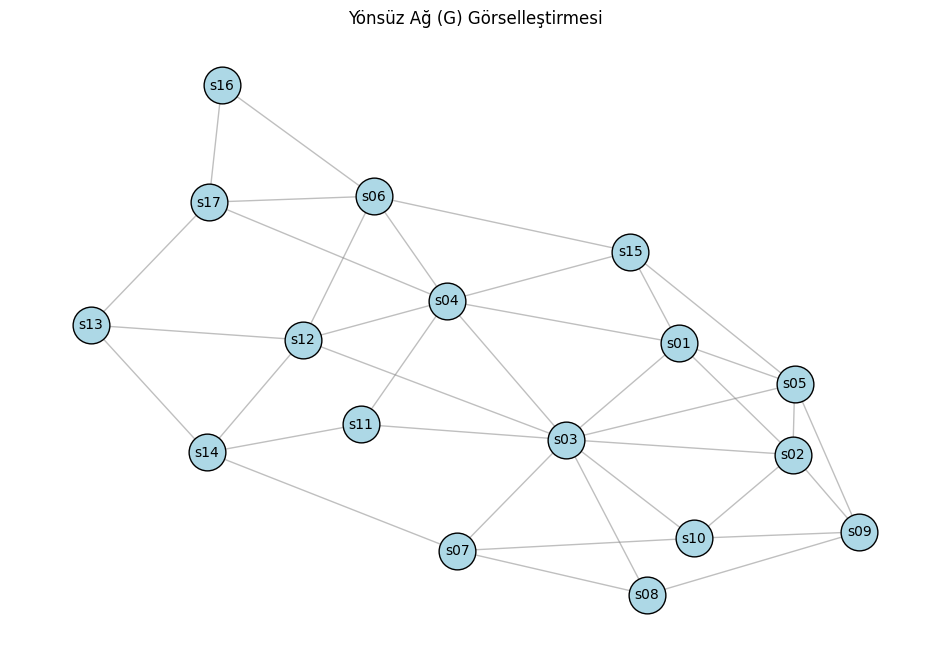

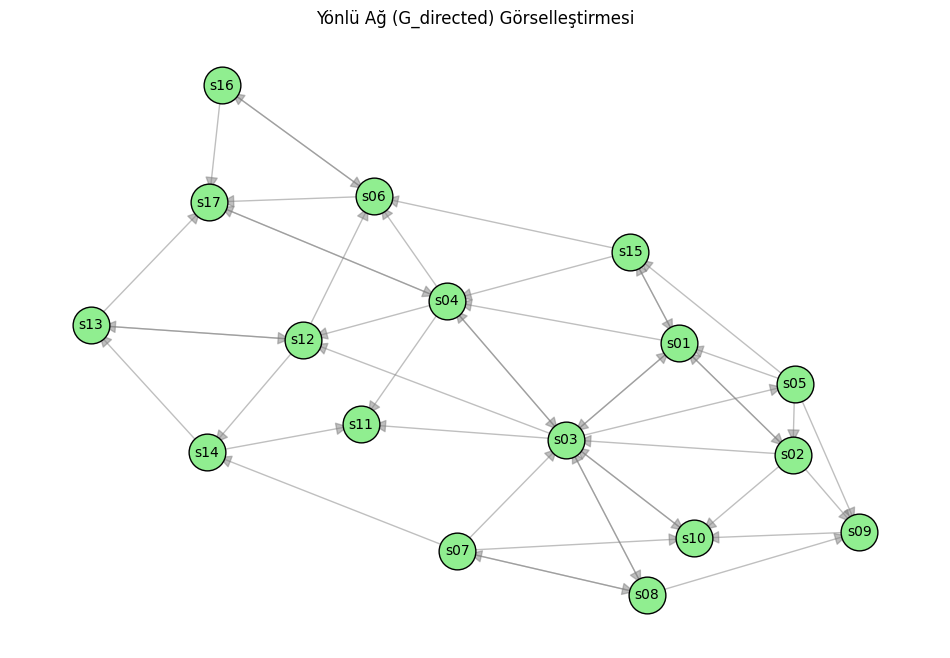

In [15]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42) 

nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue", edgecolors="black")
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

plt.title("Yönsüz Ağ (G) Görselleştirmesi")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_directed, pos, node_size=700, node_color="lightgreen", edgecolors="black")
nx.draw_networkx_edges(G_directed, pos, edge_color="gray", alpha=0.5, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G_directed, pos, font_size=10)

plt.title("Yönlü Ağ (G_directed) Görselleştirmesi")
plt.axis("off")
plt.show()

## 6. Dereceler ve Histogram


Düğüm Dereceleri: {'s01': 5, 's02': 5, 's03': 9, 's04': 7, 's05': 5, 's06': 5, 's07': 4, 's08': 3, 's09': 4, 's10': 4, 's11': 3, 's12': 5, 's13': 3, 's14': 4, 's15': 4, 's16': 2, 's17': 4}
Ortalama derece: 4.47


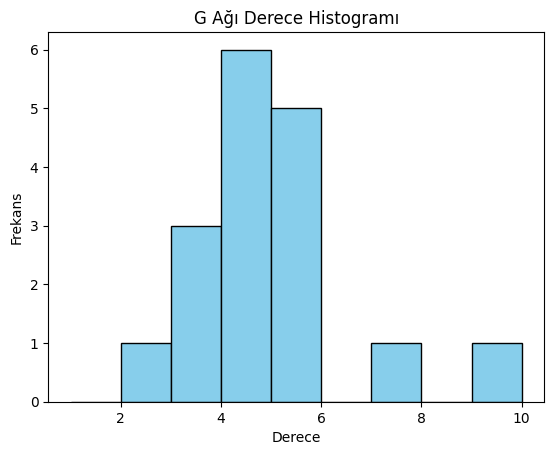

In [16]:
from numpy._typing._array_like import ArrayLike


degree_dict = dict[bytes, bytes](G.degree())
print("Düğüm Dereceleri:", degree_dict)

avg_degree = np.mean(list[bytes](degree_dict.values()))
print(f"Ortalama derece: {avg_degree:.2f}")

plt.figure()
plt.hist(
    list[ArrayLike](degree_dict.values()),
    bins=range(1, max(degree_dict.values()) + 2),
    color="skyblue",
    edgecolor="black",
)
plt.title("G Ağı Derece Histogramı")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.show()


## 7. Merkeziyet Metrikleri ve Ağ İstatistikleri


Modularity: 0.324
Density: 0.279
Average Clustering: 0.421
Diameter: 4

Merkeziyet Tablosu:


,Degree,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Katz Centrality,PageRank
s01,5,0.3125,0.533333,0.039147,0.319141,0.266190,0.062046
s02,5,0.3125,0.484848,0.025992,0.291034,0.258522,0.062723
s03,9,0.5625,0.666667,0.340417,0.448547,0.347890,0.108593
s04,7,0.4375,0.615385,0.195665,0.352833,0.303804,0.087176
s05,5,0.3125,0.516129,0.065456,0.292553,0.258697,0.062650
s06,5,0.3125,0.500000,0.100188,0.206888,0.244298,0.067515
s07,4,0.2500,0.484848,0.050278,0.193619,0.225942,0.053893
s08,3,0.1875,0.457143,0.019593,0.164630,0.205493,0.041823
s09,4,0.2500,0.410256,0.017361,0.191592,0.221377,0.053139
s10,4,0.2500,0.470588,0.025843,0.222095,0.231345,0.052486


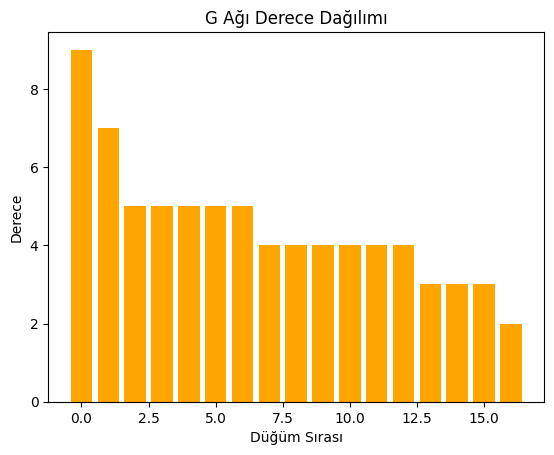

In [17]:
from typing import Any


deg_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
katz_centrality = nx.katz_centrality_numpy(G)
pagerank_centrality = nx.pagerank(G)

communities = list[Any](community.greedy_modularity_communities(G))
modularity = community.modularity(G, communities)
density = nx.density(G)
avg_clustering = nx.average_clustering(G)
diameter = nx.diameter(G) if nx.is_connected(G) else np.nan

print(f"Modularity: {modularity:.3f}")
print(f"Density: {density:.3f}")
print(f"Average Clustering: {avg_clustering:.3f}")
print(
    f"Diameter: {diameter if not np.isnan(diameter) else 'Graf bağlantılı değil'}"
)

metrics_df = pd.DataFrame({
    "Degree": degree_dict,
    "Degree Centrality": deg_centrality,
    "Closeness Centrality": closeness_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Eigenvector Centrality": eigenvector_centrality,
    "Katz Centrality": katz_centrality,
    "PageRank": pagerank_centrality,
})

print("\nMerkeziyet Tablosu:")
display(metrics_df)

degree_sequence = sorted([d for _, d in G.degree()], reverse=True)
plt.figure()
plt.bar(range(len(degree_sequence)), degree_sequence, color="orange")
plt.title("G Ağı Derece Dağılımı")
plt.xlabel("Düğüm Sırası")
plt.ylabel("Derece")
plt.show()


## 8. Kritik Düğümler ve Derece Dağılımları


Top 5 Köprü Düğüm:
- s03: 0.340
- s04: 0.196
- s12: 0.123
- s06: 0.100
- s05: 0.065

Top 5 Lider Düğüm:
- s03: 9
- s04: 7
- s01: 5
- s02: 5
- s05: 5


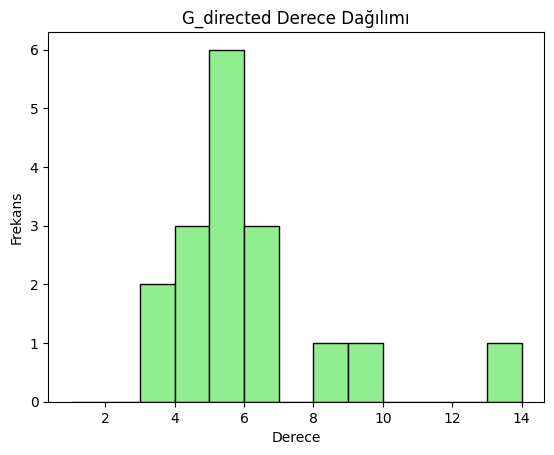

In [18]:
top5_bridges = sorted(
    betweenness_centrality.items(), key=lambda x: x[1], reverse=True
)[:5]
top5_leaders = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Köprü Düğüm:")
for node, score in top5_bridges:
    print(f"- {node}: {score:.3f}")

print("\nTop 5 Lider Düğüm:")
for node, score in top5_leaders:
    print(f"- {node}: {score}")

plt.figure()
plt.hist(
    [deg for _, deg in G_directed.degree()],
    bins=range(1, max(dict[bytes, bytes](G_directed.degree()).values()) + 2),
    color="lightgreen",
    edgecolor="black",
)
plt.title("G_directed Derece Dağılımı")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.show()


## 9. En Güçlü 3 Düğümü Kaldırma Senaryosu


Çıkarılacak en güçlü düğümler: ['s03', 's04', 's01']


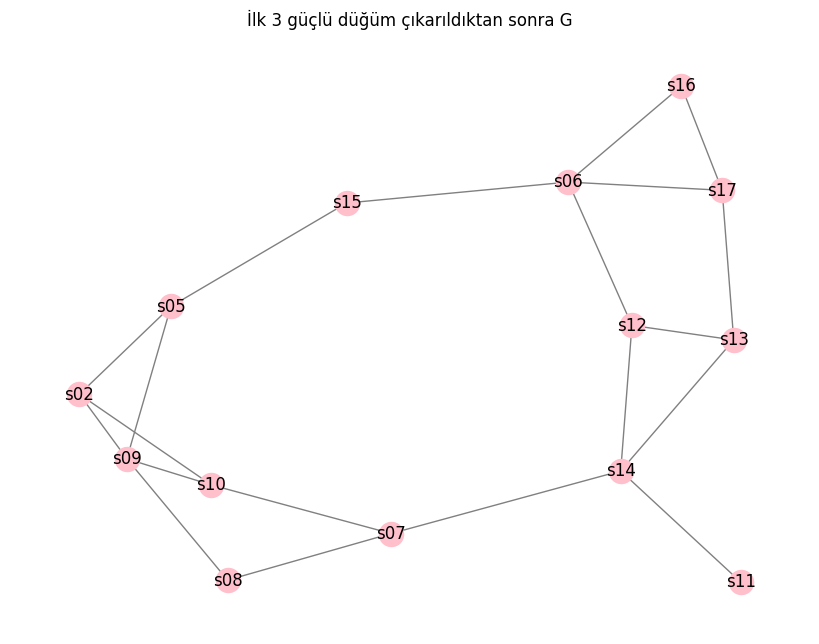

Yeni düğüm sayısı: 14 | Yeni kenar sayısı: 20


In [19]:
top3_nodes = [node for node, _ in top5_leaders[:3]]
print("Çıkarılacak en güçlü düğümler:", top3_nodes)

G_removed = G.copy()
G_removed.remove_nodes_from(top3_nodes)

plt.figure(figsize=(8, 6))
nx.draw(G_removed, with_labels=True, node_color="pink", edge_color="gray")
plt.title("İlk 3 güçlü düğüm çıkarıldıktan sonra G")
plt.show()

print(
    f"Yeni düğüm sayısı: {G_removed.number_of_nodes()} | Yeni kenar sayısı: {G_removed.number_of_edges()}"
)


## 10. Yorumlar

- Ağ güçlü bir modüler yapıya sahip, topluluklar belirgin.
- Derece ve betweenness sıralamasında öne çıkan `s03`, ağın kritik düğümü konumunda.
- İlk 3 düğüm çıkarılsa bile ağ parçalanmıyor ancak bağlantı sayısı düşüyor ve yol uzunlukları artıyor.
